# Course Project Part 1

Yu-Hsuan (Monica) Ko

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.reset_option('display.float_format')

In [2]:
# The folder containing files
folder_path = 'dataset' 

# Get all csv files in the folder
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Concatenate files (set the type to object first to avoid data values change)
df = pd.concat((pd.read_csv(f, dtype = 'object') for f in all_files), ignore_index=True)

## Data Overview

In [3]:
df.shape

(1185534, 22)

In [4]:
df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12045583,JD226426,05/07/2020 10:24:00 AM,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,false,false,0212,002,3,35,06,1178180,1881621,2020,05/14/2020 08:47:15 AM,41.830481843,-87.621751752,"(41.830481843, -87.621751752)"
1,12031001,JD209965,04/16/2020 05:00:00 AM,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,true,false,0915,009,11,60,08B,1173292,1883705,2020,04/23/2020 03:45:11 PM,41.836310224,-87.639624112,"(41.836310224, -87.639624112)"
2,12093529,JD282112,07/01/2020 10:16:00 AM,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,true,false,0422,004,7,46,04A,1198234,1851595,2020,07/08/2020 03:41:45 PM,41.747609555,-87.549179329,"(41.747609555, -87.549179329)"
3,12178140,JD381597,09/27/2020 11:29:00 PM,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,false,false,0726,007,15,67,08B,1164812,1861251,2020,10/04/2020 03:43:55 PM,41.77487752,-87.671374872,"(41.77487752, -87.671374872)"
4,12126129,JD321064,08/04/2020 08:28:00 PM,081XX S LOOMIS BLVD,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,true,false,0613,006,21,71,15,1168412,1850836,2020,08/11/2020 03:42:53 PM,41.746220584,-87.658477307,"(41.746220584, -87.658477307)"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185534 entries, 0 to 1185533
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   ID                    1185534 non-null  object
 1   Case Number           1185534 non-null  object
 2   Date                  1185534 non-null  object
 3   Block                 1185534 non-null  object
 4   IUCR                  1185534 non-null  object
 5   Primary Type          1185534 non-null  object
 6   Description           1185534 non-null  object
 7   Location Description  1178841 non-null  object
 8   Arrest                1185534 non-null  object
 9   Domestic              1185534 non-null  object
 10  Beat                  1185534 non-null  object
 11  District              1185534 non-null  object
 12  Ward                  1185486 non-null  object
 13  Community Area        1185532 non-null  object
 14  FBI Code              1185534 non-null  object
 15

In [6]:
df.isna().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     6693
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                       48
Community Area              2
FBI Code                    0
X Coordinate            18715
Y Coordinate            18715
Year                        0
Updated On                  0
Latitude                18715
Longitude               18715
Location                18715
dtype: int64

In [7]:
df.describe()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
count,1185534,1185534,1185534,1185534,1185534,1185534,1185534,1178841,1185534,1185534,1185534,1185534,1185486,1185532,1185534,1166819,1166819,1185534,1185534,1166819,1166819,1166819
unique,1185534,1185382,579065,35764,350,33,478,187,2,2,275,24,50,77,27,66400,108095,5,4132,321258,321161,321423
top,12045583,JC470284,01/01/2021 12:00:00 AM,001XX N STATE ST,0486,THEFT,SIMPLE,STREET,false,false,1834,011,42,25,06,1176352,1900927,2023,01/03/2023 03:40:27 PM,41.883500187,-87.627876698,"(41.883500187, -87.627876698)"
freq,1,5,165,3384,102458,256989,135319,304428,1008769,948335,13851,75774,56185,64255,256989,2135,1660,262592,227167,1654,1654,1654


In [8]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [9]:
# remove space
for col in df.columns:
    df[col] = df[col].apply(lambda x: str(x).strip())

In [10]:
len(df.drop_duplicates())

1185534

In [11]:
len(df['ID'].unique())

1185534

In [12]:
print(df['Date'].min())
print(df['Date'].max())

01/01/2019 01:00:00 AM
12/31/2023 12:55:00 AM


In [13]:
df.groupby(['Location Description', 'Primary Type'])['Primary Type'].size()

Location Description  Primary Type       
ABANDONED BUILDING    ARSON                   26
                      ASSAULT                 15
                      BATTERY                 54
                      BURGLARY               119
                      CRIM SEXUAL ASSAULT      9
                                            ... 
nan                   ROBBERY                 17
                      SEX OFFENSE              4
                      STALKING                 2
                      THEFT                   44
                      WEAPONS VIOLATION        1
Name: Primary Type, Length: 2515, dtype: int64

In [14]:
df['Location Description'].value_counts()

Location Description
STREET                304428
APARTMENT             210768
RESIDENCE             177172
SIDEWALK               71039
SMALL RETAIL STORE     32237
                       ...  
CHA ELEVATOR               1
ELEVATOR                   1
BANQUET HALL               1
ROOF                       1
HORSE STABLE               1
Name: count, Length: 188, dtype: int64

In [15]:
df[df['Case Number'].duplicated()].sort_values(by='Case Number')

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
926745,24369,JC103046,01/03/2019 02:37:00 PM,050XX S INDIANA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,false,false,0224,002,3,38,01A,1178455,1871575,2019,09/01/2022 03:42:17 PM,41.802908524,-87.62104831,"(41.802908524, -87.62104831)"
927031,24396,JC138307,02/03/2019 02:40:00 AM,009XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,false,false,0323,003,8,69,01A,1183963,1855484,2019,09/19/2022 03:41:05 PM,41.758626359,-87.601350551,"(41.758626359, -87.601350551)"
926882,24461,JC208229,04/01/2019 08:50:00 PM,007XX S CICERO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,false,false,1131,011,24,25,01A,1144511,1896107,2019,09/01/2022 03:42:17 PM,41.870932257,-87.744921277,"(41.870932257, -87.744921277)"
927024,24462,JC208421,04/01/2019 11:55:00 PM,077XX S EGGLESTON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,false,false,0621,006,17,69,01A,1174634,1853662,2019,09/01/2022 03:42:17 PM,41.753839308,-87.635594607,"(41.753839308, -87.635594607)"
926875,24481,JC218766,04/10/2019 09:53:00 AM,034XX W OHIO ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,true,false,1121,011,27,23,01A,1153132,1903782,2019,09/01/2022 03:42:17 PM,41.89182673,-87.713066625,"(41.89182673, -87.713066625)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472951,27853,JG499426,11/10/2023 08:52:00 PM,083XX S PULASKI RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,false,false,0834,008,18,70,01A,1151183,1848997,2023,11/18/2023 03:40:25 PM,41.741527505,-87.721656705,"(41.741527505, -87.721656705)"
472784,27852,JG499426,11/10/2023 05:16:00 PM,083XX S PULASKI RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,false,false,0834,008,18,70,01A,1151183,1848997,2023,11/18/2023 03:40:25 PM,41.741527505,-87.721656705,"(41.741527505, -87.721656705)"
478404,27872,JG510509,11/19/2023 03:00:00 PM,089XX S COTTAGE GROVE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,false,false,0633,006,8,44,01A,1183122,1846020,2023,11/27/2023 03:41:35 PM,41.732675718,-87.604726411,"(41.732675718, -87.604726411)"
494213,27906,JG538547,12/12/2023 06:16:00 PM,035XX W 61ST PL,0110,HOMICIDE,FIRST DEGREE MURDER,PORCH,true,false,0823,008,14,66,01A,1153760,1863608,2023,12/20/2023 03:41:19 PM,41.781571789,-87.711827796,"(41.781571789, -87.711827796)"


In [16]:
dup_list = df[df['Case Number'].duplicated()]['Case Number'].unique().tolist()
df[df['Case Number'].isin(dup_list)].sort_values(by='Case Number')

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
926609,24368,JC103046,01/03/2019 02:37:00 PM,050XX S INDIANA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,false,false,0224,002,3,38,01A,1178455,1871575,2019,09/01/2022 03:42:17 PM,41.802908524,-87.62104831,"(41.802908524, -87.62104831)"
926745,24369,JC103046,01/03/2019 02:37:00 PM,050XX S INDIANA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,false,false,0224,002,3,38,01A,1178455,1871575,2019,09/01/2022 03:42:17 PM,41.802908524,-87.62104831,"(41.802908524, -87.62104831)"
927031,24396,JC138307,02/03/2019 02:40:00 AM,009XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,false,false,0323,003,8,69,01A,1183963,1855484,2019,09/19/2022 03:41:05 PM,41.758626359,-87.601350551,"(41.758626359, -87.601350551)"
926874,24395,JC138307,02/03/2019 02:34:00 AM,009XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,false,false,0323,003,8,69,01A,1183963,1855484,2019,09/19/2022 03:41:05 PM,41.758626359,-87.601350551,"(41.758626359, -87.601350551)"
926773,24460,JC208229,04/01/2019 08:29:00 PM,007XX S CICERO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,false,false,1131,011,24,25,01A,1144511,1896107,2019,09/01/2022 03:42:17 PM,41.870932257,-87.744921277,"(41.870932257, -87.744921277)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478404,27872,JG510509,11/19/2023 03:00:00 PM,089XX S COTTAGE GROVE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,false,false,0633,006,8,44,01A,1183122,1846020,2023,11/27/2023 03:41:35 PM,41.732675718,-87.604726411,"(41.732675718, -87.604726411)"
494092,27907,JG538547,12/12/2023 06:16:00 PM,035XX W 61ST PL,0110,HOMICIDE,FIRST DEGREE MURDER,PORCH,true,false,0823,008,14,66,01A,1153760,1863608,2023,12/20/2023 03:41:19 PM,41.781571789,-87.711827796,"(41.781571789, -87.711827796)"
494213,27906,JG538547,12/12/2023 06:16:00 PM,035XX W 61ST PL,0110,HOMICIDE,FIRST DEGREE MURDER,PORCH,true,false,0823,008,14,66,01A,1153760,1863608,2023,12/20/2023 03:41:19 PM,41.781571789,-87.711827796,"(41.781571789, -87.711827796)"
498516,27913,JG545814,12/18/2023 05:10:00 PM,065XX S CLAREMONT AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,false,false,0832,008,16,66,01A,1161867,1861265,2023,12/26/2023 03:41:46 PM,41.774977636,-87.682170473,"(41.774977636, -87.682170473)"


In [17]:
len(dup_list)

134

In [18]:
df_dupcheck = df.columns.tolist()[1:]
df_dupcheck

['Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [19]:
len(df.drop_duplicates(subset=['Case Number',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']))

1185421

In [20]:
len(df.drop_duplicates(subset='Case Number'))

1185382

## Plot

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date if not already sorted
df = df.sort_values(by='Date')

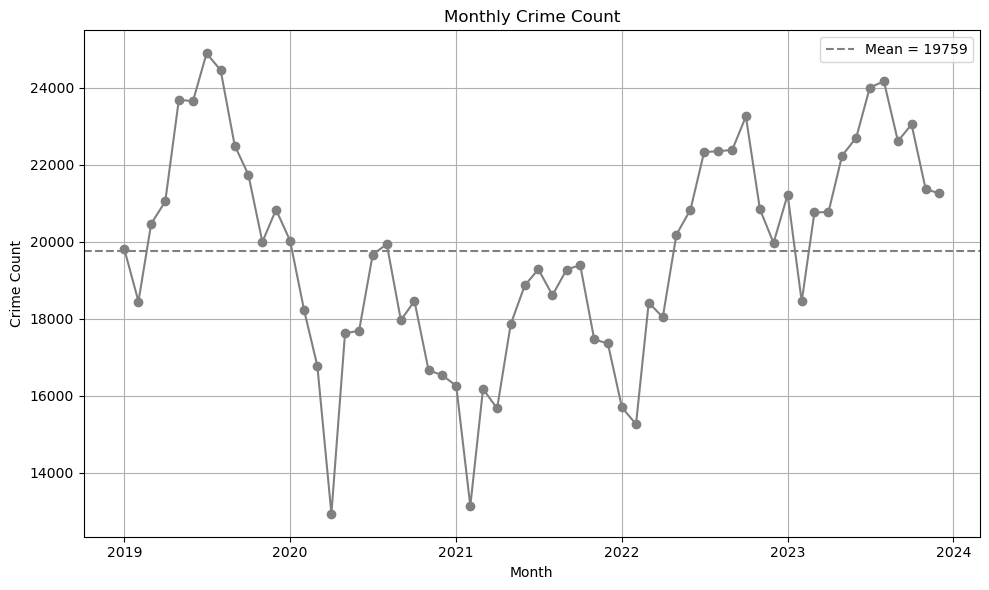

In [22]:
# Aggregate to monthly crime count
monthly_crime_count = df.groupby(df['Date'].dt.to_period('M')).size().reset_index(name='crime count')
monthly_crime_count['Date'] = monthly_crime_count['Date'].dt.to_timestamp()  # Convert period to timestamp for plotting

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_crime_count['Date'], monthly_crime_count['crime count'], linestyle='-', marker='o', color='gray')
plt.axhline(monthly_crime_count['crime count'].mean(), color='gray', linestyle='--', label=f"Mean = {monthly_crime_count['crime count'].mean():.0f}")
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.title('Monthly Crime Count')
plt.grid(True)
#plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

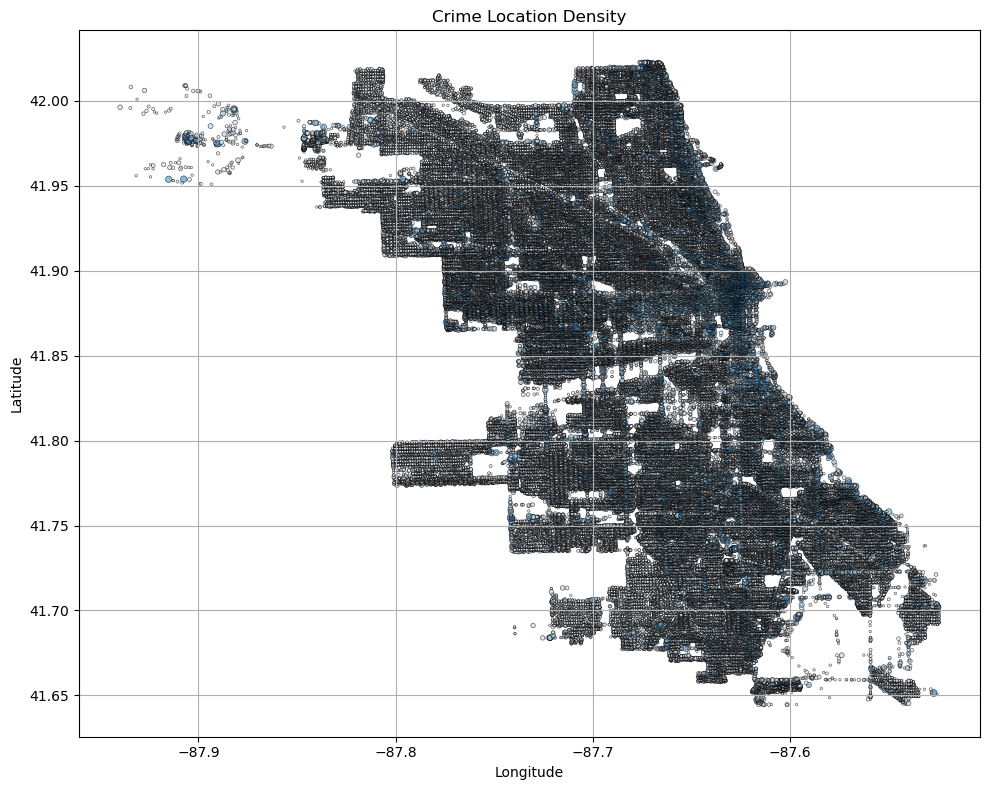

In [23]:
# check the type to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# dropna
df = df.dropna(subset=['Latitude', 'Longitude'])
df = df[df['Latitude']>37]

# count the incidents
location_counts = df.groupby(['Latitude', 'Longitude']).size().reset_index(name='count')

# plot
plt.figure(figsize=(10, 8))
sizes = np.log10(location_counts['count'] + 1) * 10

plt.scatter(location_counts['Longitude'], location_counts['Latitude'], 
            s=sizes, c=sizes, cmap='Blues', alpha=0.6, edgecolors='k', linewidth=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Location Density')
plt.grid(True)
plt.tight_layout()

plt.show()

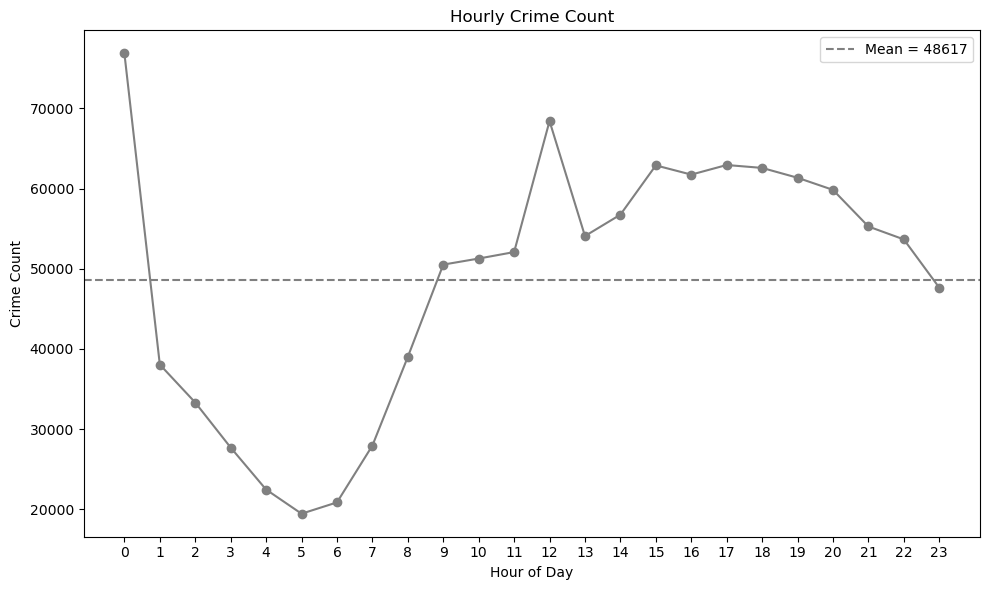

In [24]:
# to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# count the hourly incidents
hourly_crime_count = df.groupby(df['Date'].dt.hour).size().reset_index(name='crime count')
hourly_crime_count = hourly_crime_count.sort_values(by='Date')

# plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_crime_count['Date'], hourly_crime_count['crime count'], linestyle='-', marker='o', color='gray')
plt.axhline(hourly_crime_count['crime count'].mean(), color='gray', linestyle='--', label=f"Mean = {hourly_crime_count['crime count'].mean():.0f}")
plt.xlabel('Hour of Day')
plt.ylabel('Crime Count')
plt.title('Hourly Crime Count')
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()

plt.show()


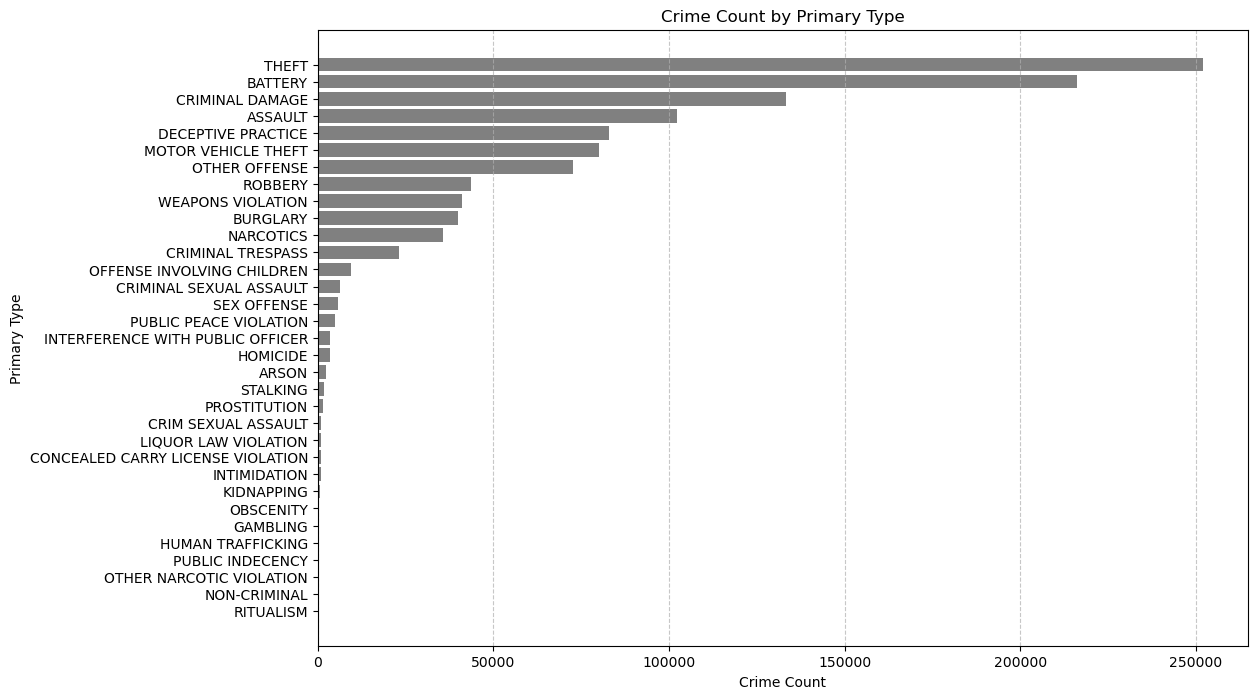

In [25]:
# count the incidents by primary type
primary_type_counts = df['Primary Type'].value_counts().reset_index()
primary_type_counts.columns = ['Primary Type', 'Count']

# plot
plt.figure(figsize=(12, 8))
plt.barh(primary_type_counts['Primary Type'], primary_type_counts['Count'], color='gray')
plt.xlabel('Crime Count')
plt.ylabel('Primary Type')
plt.title('Crime Count by Primary Type')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)


## Data Cleaning and Processing

In [26]:
# Sort by case_number and date
df_sorted = df.sort_values(by=['Case Number', 'Date'], ascending=[True, False])

# Drop duplicates based on case_number, keeping only the first occurrence
df_1 = df_sorted.drop_duplicates(subset='Case Number', keep='first')

In [27]:
len(df_1)

1166663

In [28]:
# Rename Columns
df_1.columns = df_1.columns.str.replace(' ', '_')
df_1.columns

Index(['ID', 'Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type',
       'Description', 'Location_Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community_Area', 'FBI_Code', 'X_Coordinate',
       'Y_Coordinate', 'Year', 'Updated_On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [29]:
# Add Columns
df_1['Date'] = pd.to_datetime(df_1['Date'])

# Create new columns for year, month, day, and hour
df_1['Year'] = df_1['Date'].dt.year
df_1['Month'] = df_1['Date'].dt.month
df_1['Day'] = df_1['Date'].dt.day
df_1['Hour'] = df_1['Date'].dt.hour

In [30]:
# Dummy Variables
categorical_columns = ['Primary_Type', 'District', 'Location_Description']

# Create dummy variables
df_1 = pd.get_dummies(df_1, columns=categorical_columns, drop_first=True)

# Display DataFrame with dummy variables
df_1.head()

,ID,Case_Number,Date,Block,IUCR,Description,Arrest,Domestic,Beat,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location,Month,Day,Hour,Primary_Type_ASSAULT,Primary_Type_BATTERY,Primary_Type_BURGLARY,Primary_Type_CONCEALED CARRY LICENSE VIOLATION,Primary_Type_CRIM SEXUAL ASSAULT,Primary_Type_CRIMINAL DAMAGE,Primary_Type_CRIMINAL SEXUAL ASSAULT,Primary_Type_CRIMINAL TRESPASS,Primary_Type_DECEPTIVE PRACTICE,Primary_Type_GAMBLING,Primary_Type_HOMICIDE,Primary_Type_HUMAN TRAFFICKING,Primary_Type_INTERFERENCE WITH PUBLIC OFFICER,Primary_Type_INTIMIDATION,Primary_Type_KIDNAPPING,Primary_Type_LIQUOR LAW VIOLATION,Primary_Type_MOTOR VEHICLE THEFT,Primary_Type_NARCOTICS,Primary_Type_NON-CRIMINAL,Primary_Type_OBSCENITY,Primary_Type_OFFENSE INVOLVING CHILDREN,Primary_Type_OTHER NARCOTIC VIOLATION,Primary_Type_OTHER OFFENSE,Primary_Type_PROSTITUTION,Primary_Type_PUBLIC INDECENCY,Primary_Type_PUBLIC PEACE VIOLATION,Primary_Type_RITUALISM,Primary_Type_ROBBERY,Primary_Type_SEX OFFENSE,Primary_Type_STALKING,Primary_Type_THEFT,Primary_Type_WEAPONS VIOLATION,District_002,District_003,District_004,District_005,District_006,District_007,District_008,District_009,District_010,District_011,District_012,District_014,District_015,District_016,District_017,District_018,District_019,District_020,District_022,District_024,District_025,District_031,District_16,Location_Description_AIRCRAFT,Location_Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,Location_Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA,Location_Description_AIRPORT EXTERIOR - NON-SECURE AREA,Location_Description_AIRPORT EXTERIOR - SECURE AREA,Location_Description_AIRPORT PARKING LOT,Location_Description_AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,Location_Description_AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,Location_Description_AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,Location_Description_AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,Location_Description_AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,Location_Description_AIRPORT TRANSPORTATION SYSTEM (ATS),Location_Description_AIRPORT VENDING ESTABLISHMENT,Location_Description_AIRPORT/AIRCRAFT,Location_Description_ALLEY,Location_Description_ANIMAL HOSPITAL,Location_Description_APARTMENT,Location_Description_APPLIANCE STORE,Location_Description_ATHLETIC CLUB,Location_Description_ATM (AUTOMATIC TELLER MACHINE),Location_Description_AUTO,Location_Description_AUTO / BOAT / RV DEALERSHIP,Location_Description_BANK,Location_Description_BANQUET HALL,Location_Description_BAR OR TAVERN,Location_Description_BARBER SHOP/BEAUTY SALON,Location_Description_BARBERSHOP,Location_Description_BASEMENT,Location_Description_BEACH,Location_Description_BOAT / WATERCRAFT,Location_Description_BOAT/WATERCRAFT,Location_Description_BOWLING ALLEY,Location_Description_BRIDGE,Location_Description_CAR WASH,Location_Description_CEMETARY,Location_Description_CHA APARTMENT,Location_Description_CHA ELEVATOR,Location_Description_CHA GROUNDS,Location_Description_CHA HALLWAY,Location_Description_CHA HALLWAY / STAIRWELL / ELEVATOR,Location_Description_CHA HALLWAY/STAIRWELL/ELEVATOR,Location_Description_CHA LOBBY,Location_Description_CHA PARKING LOT,Location_Description_CHA PARKING LOT / GROUNDS,Location_Description_CHA PARKING LOT/GROUNDS,Location_Description_CHA PLAY LOT,Location_Description_CHA STAIRWELL,Location_Description_CHURCH / SYNAGOGUE / PLACE OF WORSHIP,Location_Description_CHURCH/SYNAGOGUE/PLACE OF WORSHIP,Location_Description_CLEANING STORE,Location_Description_CLUB,Location_Description_COIN OPERATED MACHINE,Location_Description_COLLEGE / UNIVERSITY - GROUNDS,Location_Description_COLLEGE / UNIVERSITY - RESIDENCE HALL,Location_Description_COLLEGE/UNIVERSITY GROUNDS,Location_Description_COLLEGE/UNIVERSITY RESIDENCE HALL,Location_Description_COMMERCIAL / BUSINESS OFFICE,Location_Description_CONSTRUCTION SITE,Location_Description_CONVENIENCE STORE,Location_Description_CREDIT UNION,"Location_Description_C

In [32]:
df_1['Arrest'] = df_1['Arrest'].replace({'true': 1, 'false': 0})
df_1['Domestic'] = df_1['Domestic'].replace({'true': 1, 'false': 0})

In [33]:
# check the number of data rows and columns
df_1.shape

(1166663, 264)

In [34]:
# save new d ataset to csv file
df_1.to_csv('Crime_cleaned.csv')